In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from gensim.models import KeyedVectors
import matplotlib.font_manager as fm
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

import sys
from pathlib import Path

# Add the project root directory to Python path
project_root = str(Path().absolute().parent)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.utils import load_models

import matplotlib.pyplot as plt
# 设置更好的可视化风格

# 设置更好的可视化风格
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
# 假设notebooks目录在项目根目录下


from src.utils import download_chinese_font
import src.utils as utils
# 下载并安装字体
font_path = download_chinese_font()

# 设置matplotlib使用下载的字体
if font_path:
    plt.rcParams['font.sans-serif'] = ['SimHei'] + plt.rcParams['font.sans-serif']
    print("成功设置中文字体")
else:
    print("无法设置中文字体，将使用替代方案")

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


# 定义项目根目录和模型目录
PROJECT_ROOT = Path.cwd().parent
MODELS_DIR = PROJECT_ROOT / "models"



字体已存在: /home/fangshikai/.fonts/SimHei.ttf
刷新字体缓存...
成功设置中文字体


In [ ]:
from change_analysis import SemanticChangeAnalyzer

print("=== 语义场变迁分析 (v2) ===")
models = utils.load_models(MODELS_DIR)
exclude_file = PROJECT_ROOT / "notebooks" / "exclude_words_network.txt"


output_root = PROJECT_ROOT / "output" / "change_analysis_v2"
analyzer = SemanticChangeAnalyzer(models, exclude_words_path=exclude_file)



字体已存在: /home/fangshikai/.fonts/SimHei.ttf
刷新字体缓存...
成功设置中文字体: SimHei
=== 语义场变迁分析 (v2) ===
使用固定时期模型目录: /home/fangshikai/law-word-vector/models/fine_tuned_vectors_flexible
找到 3 个模型文件:
  加载模型: Era1_1978-1996
  成功加载 Era1_1978-1996, 词汇量: 4874
  加载模型: Era2_1997-2013
  成功加载 Era2_1997-2013, 词汇量: 4992
  加载模型: Era3_2014-2024
  成功加载 Era3_2014-2024, 词汇量: 5000
语义变迁分析器已初始化，包含 3 个时期。
已加载 60 个排除词。




--- 场景1: 来源(top_n) + 处理(并集) ---

开始分析“法治”的语义变迁...
来源策略: top_n, 处理模式: union, 其他参数: {'top_n': 200}
最终分析词汇池大小: 437
分析完成。
已保存图表到: /home/fangshikai/law-word-vector/output/change_analysis_v2/S1_top_n_union/change_Era1_1978-1996_to_Era2_1997-2013.png


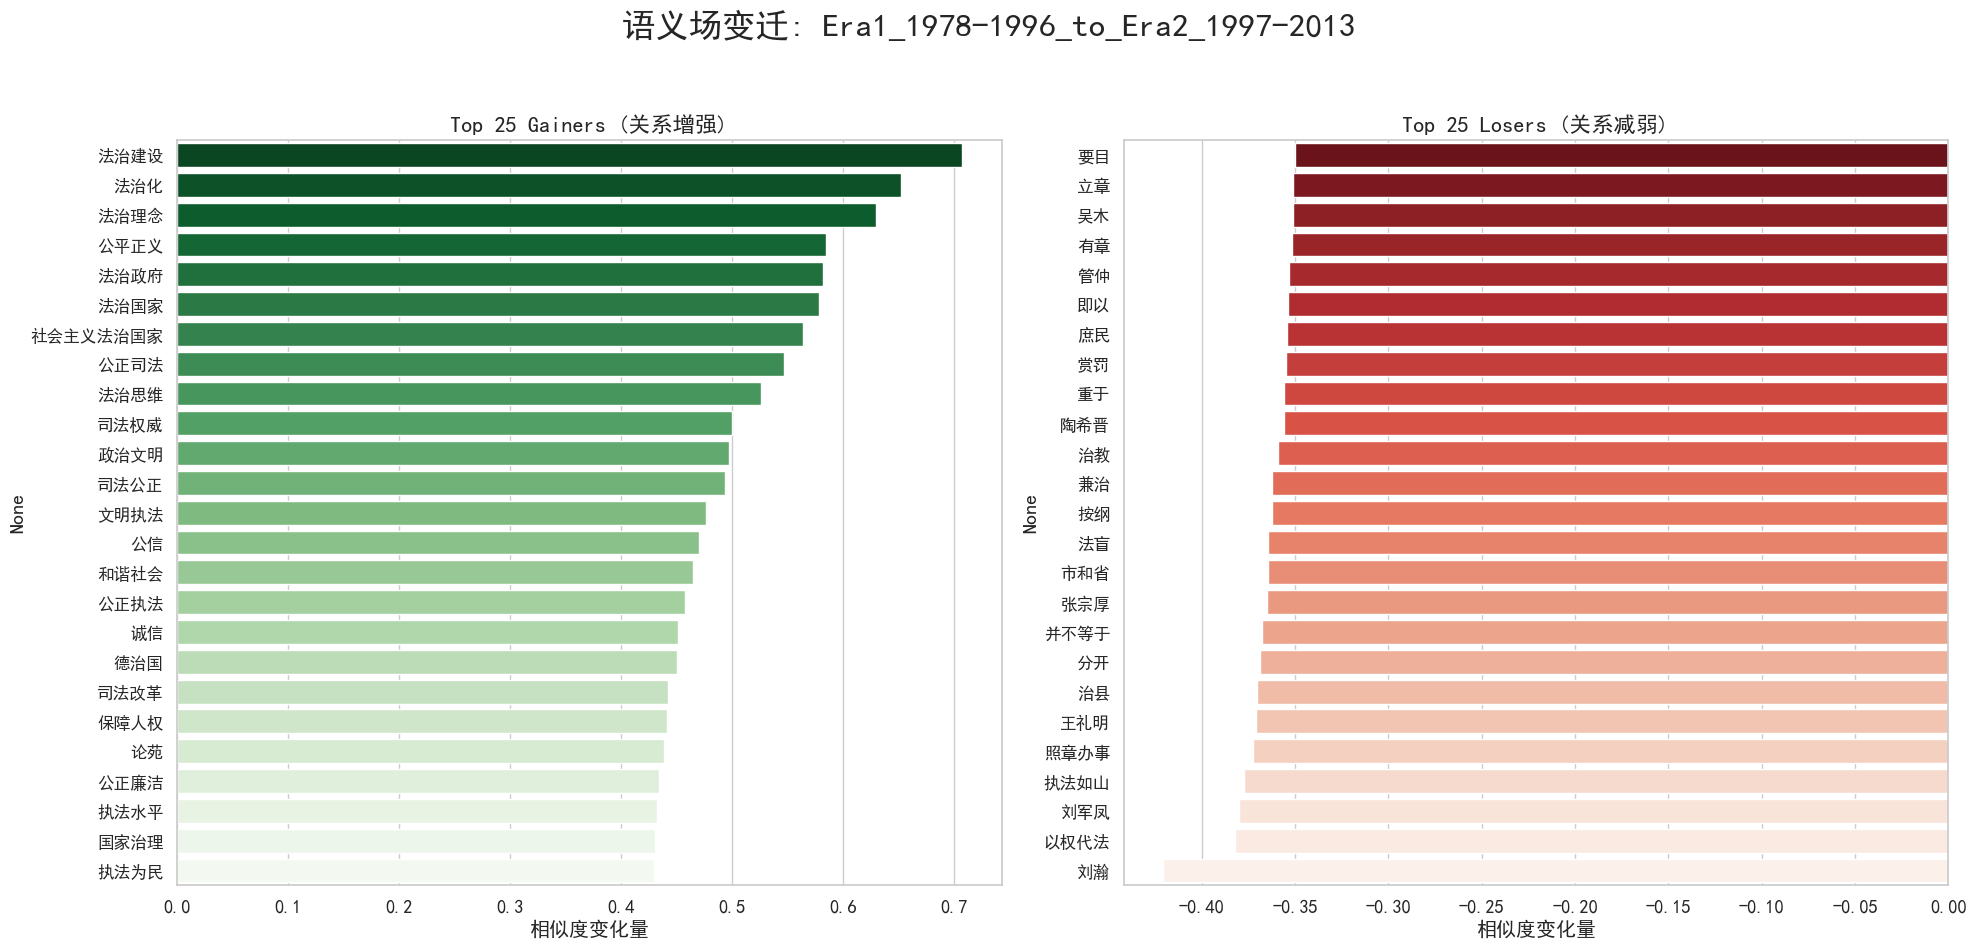

已保存图表到: /home/fangshikai/law-word-vector/output/change_analysis_v2/S1_top_n_union/change_Era2_1997-2013_to_Era3_2014-2024.png


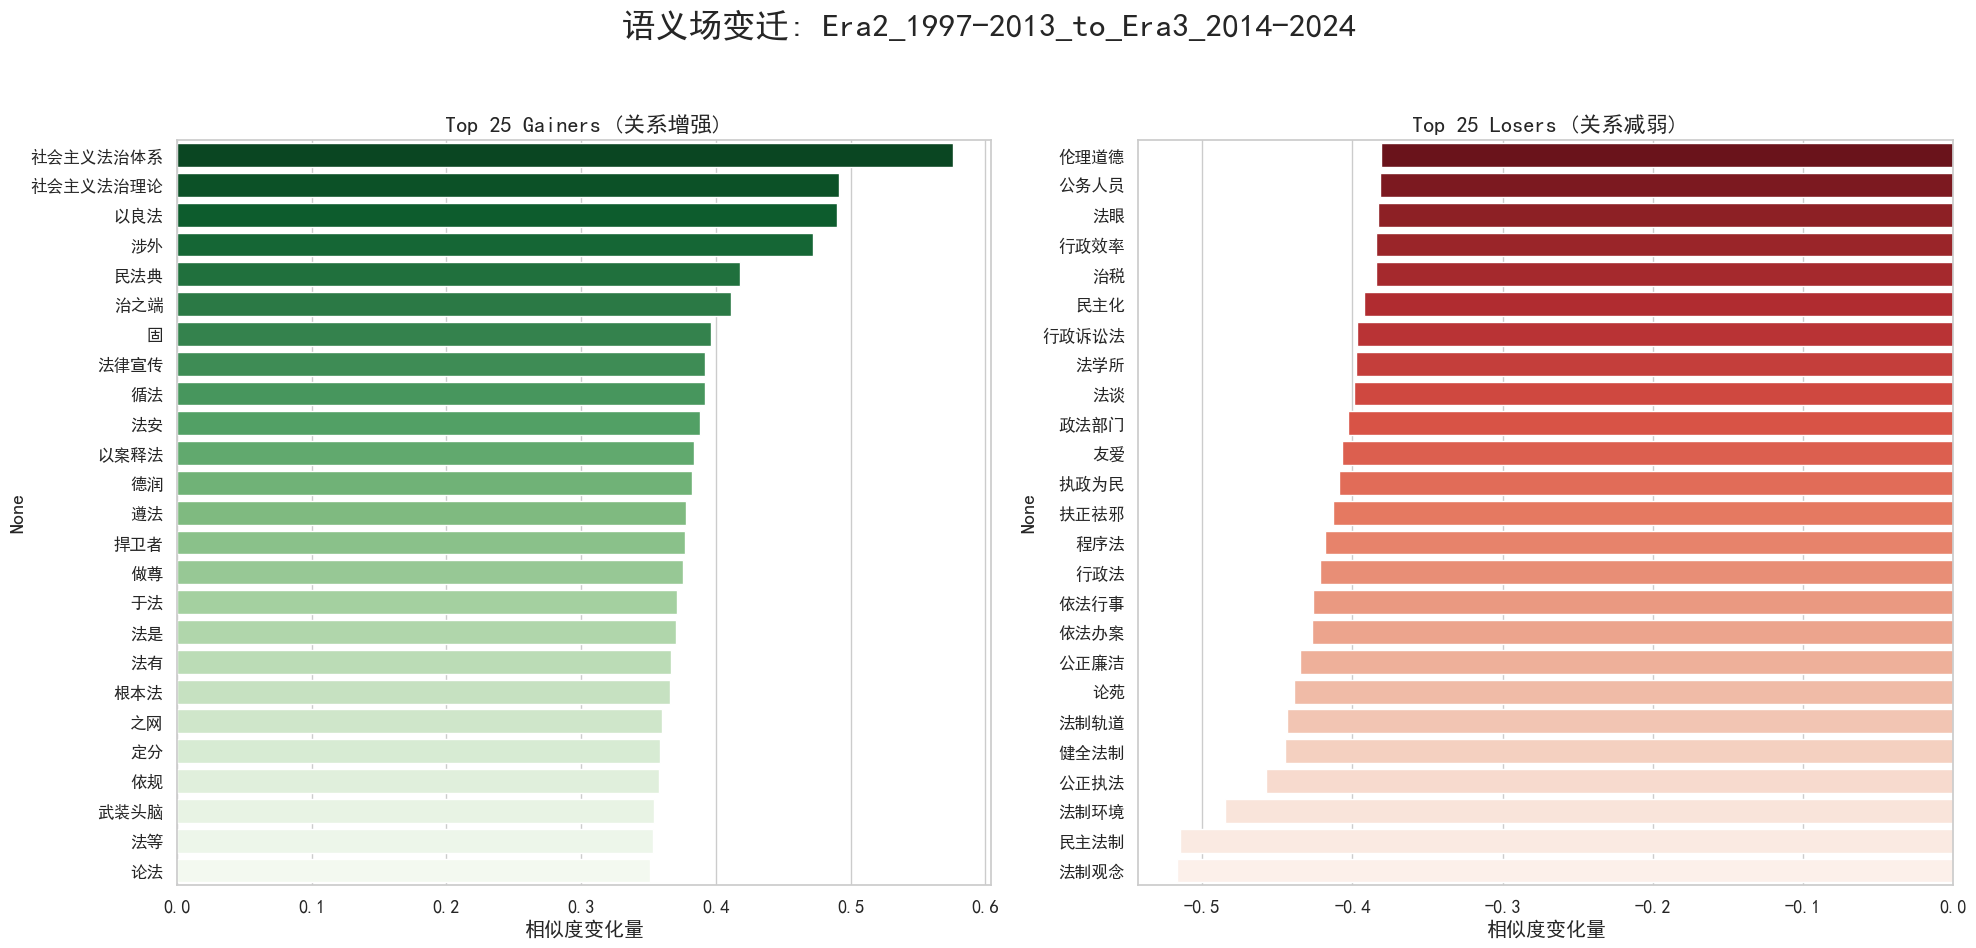

In [3]:

# --- 场景1: 来源(top_n) + 处理(并集) ---
print("\n\n--- 场景1: 来源(top_n) + 处理(并集) ---")
change_df_1 = analyzer.analyze_similarity_change(
    target_word="法治", 
    source_strategy='top_n', 
    process_mode='union',
    top_n=200
)
if not change_df_1.empty:
    for transition in change_df_1.columns:
        analyzer.plot_gainers_losers(change_df_1[transition], top_n=25, output_dir=output_root / "S1_top_n_union", filename=f"change_{transition}")




--- 场景2: 来源(维度文件) + 处理(并集) ---

开始分析“法治”的语义变迁...
来源策略: from_cluster_file, 处理模式: union, 其他参数: {'file_path': PosixPath('/home/fangshikai/law-word-vector/notebooks/topic_word/dimension_words_4d.txt')}
最终分析词汇池大小: 79
分析完成。
已保存图表到: /home/fangshikai/law-word-vector/output/change_analysis_v2/S2_dims_file/change_Era1_1978-1996_to_Era2_1997-2013_4d.png


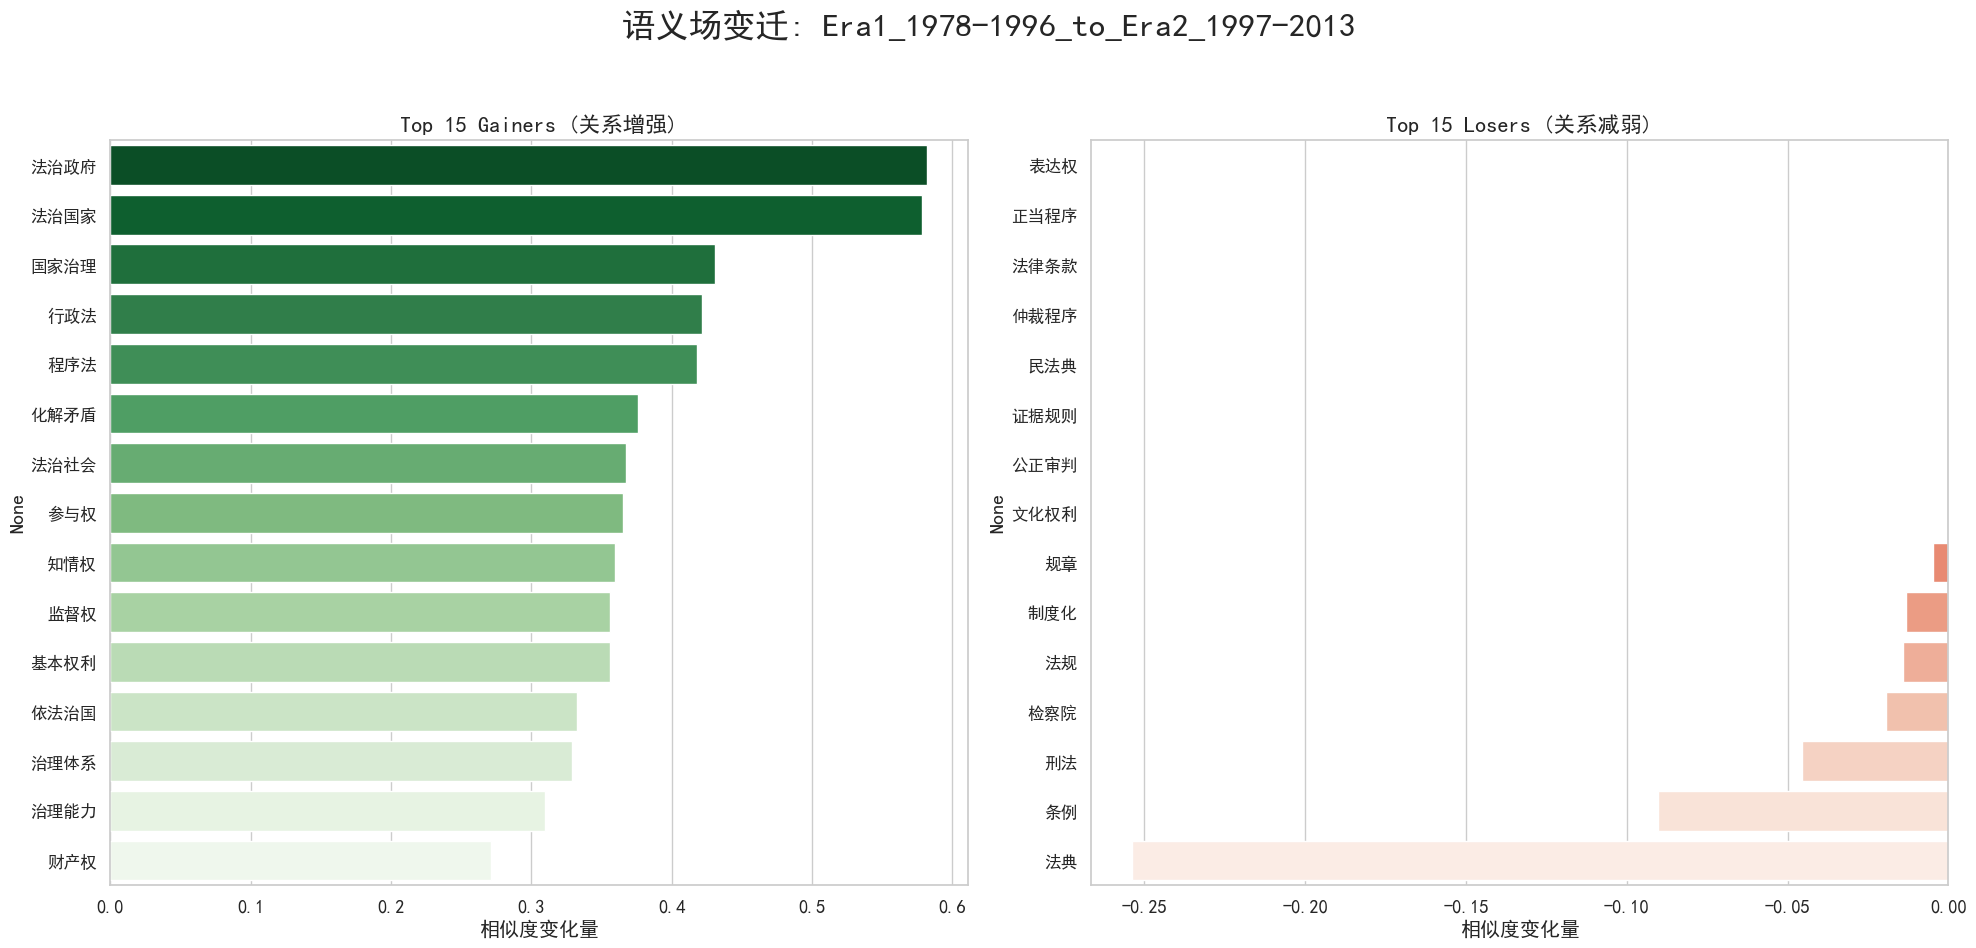

已保存图表到: /home/fangshikai/law-word-vector/output/change_analysis_v2/S2_dims_file/change_Era2_1997-2013_to_Era3_2014-2024_4d.png


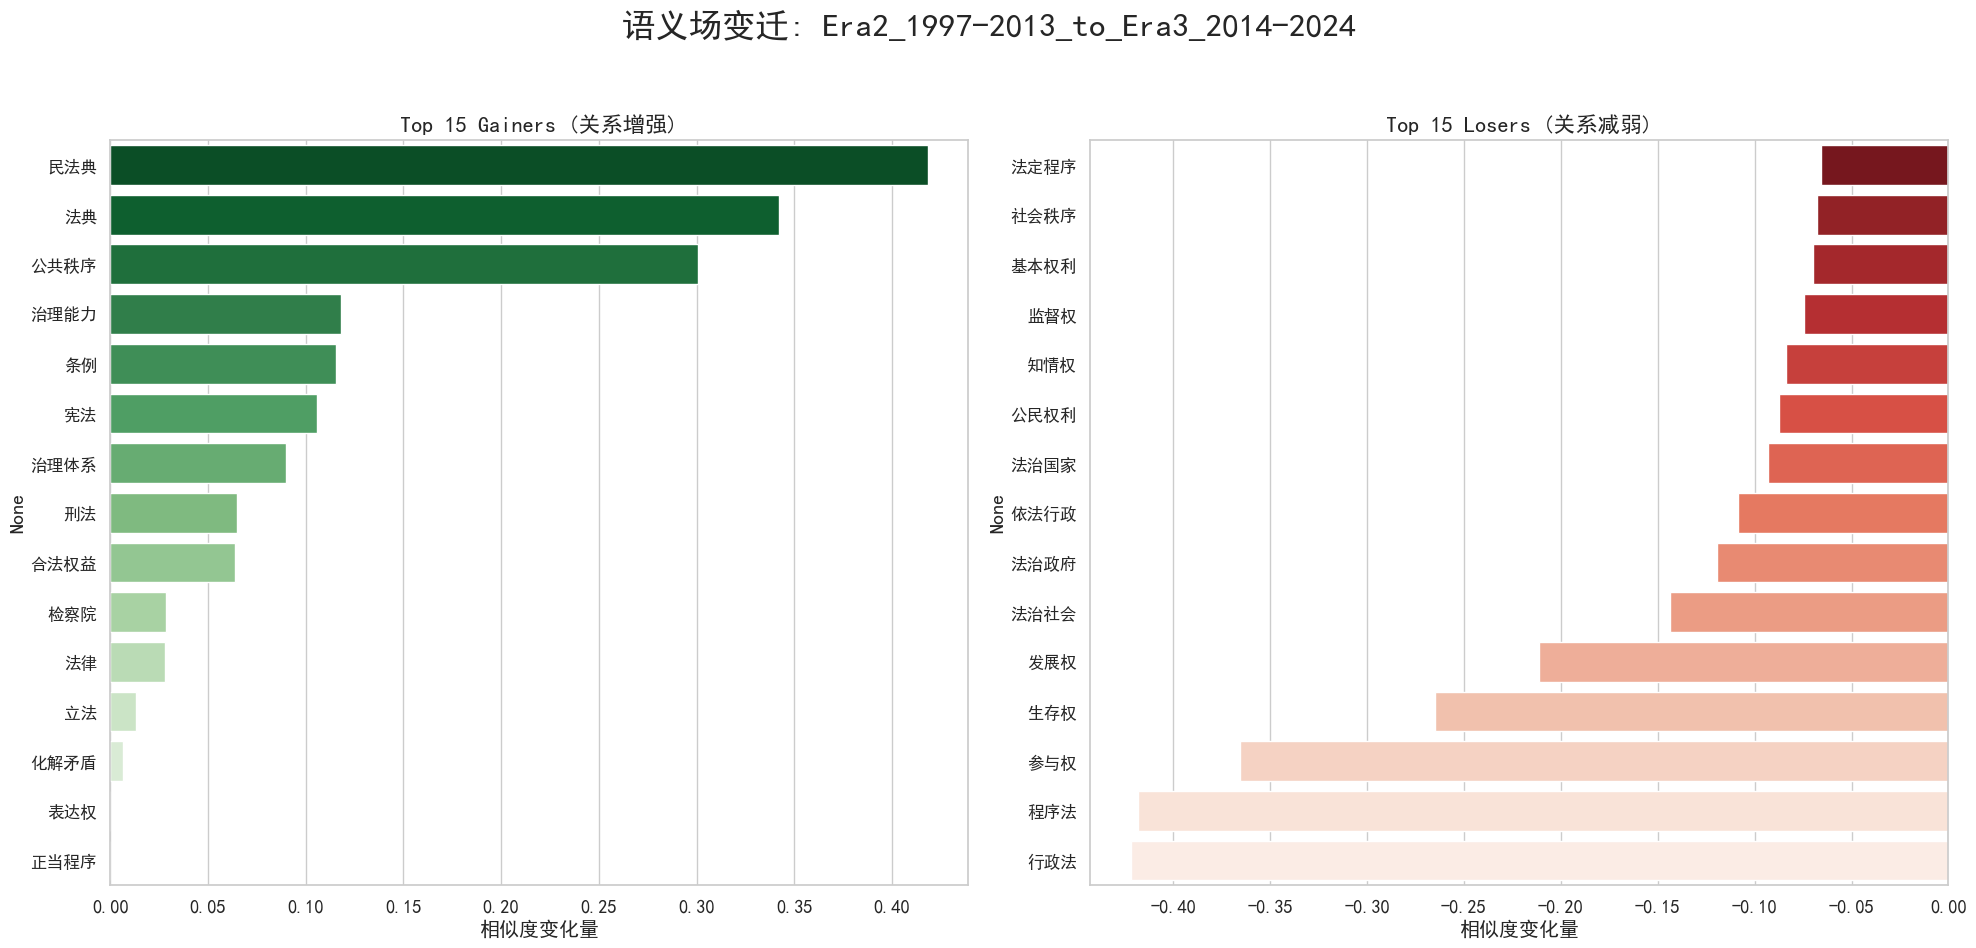

In [4]:
# --- 场景2: 来源(维度文件) + 处理(并集) ---
print("\n\n--- 场景2: 来源(维度文件) + 处理(并集) ---")
dim_file = PROJECT_ROOT / "notebooks" / "topic_word" / "dimension_words_4d.txt"
change_df_2 = analyzer.analyze_similarity_change(
    target_word="法治",
    source_strategy='from_cluster_file',
    process_mode='union', # 在此场景下，并集/交集/无处理 结果相同
    file_path=dim_file
)
if not change_df_2.empty:
    for transition in change_df_2.columns:
        analyzer.plot_gainers_losers(change_df_2[transition], top_n=15, output_dir=output_root / "S2_dims_file", filename=f"change_{transition}_4d")
        



--- 场景3: 来源(时期专家词表) + 处理(交集) ---

开始分析“法治”的语义变迁...
来源策略: from_period_specific_files, 处理模式: intersection, 其他参数: {'file_map': {'Era1_1978-1996': PosixPath('/home/fangshikai/law-word-vector/notebooks/similar_words/Era1_1978-1996_final.txt'), 'Era2_1997-2013': PosixPath('/home/fangshikai/law-word-vector/notebooks/similar_words/Era2_1997-2013_final.txt'), 'Era3_2014-2024': PosixPath('/home/fangshikai/law-word-vector/notebooks/similar_words/Era3_2014-2024_final.txt')}}
最终分析词汇池大小: 41
分析完成。
已保存图表到: /home/fangshikai/law-word-vector/output/change_analysis_v2/S3_expert_intersect/change_Era1_1978-1996_to_Era2_1997-2013_expert.png


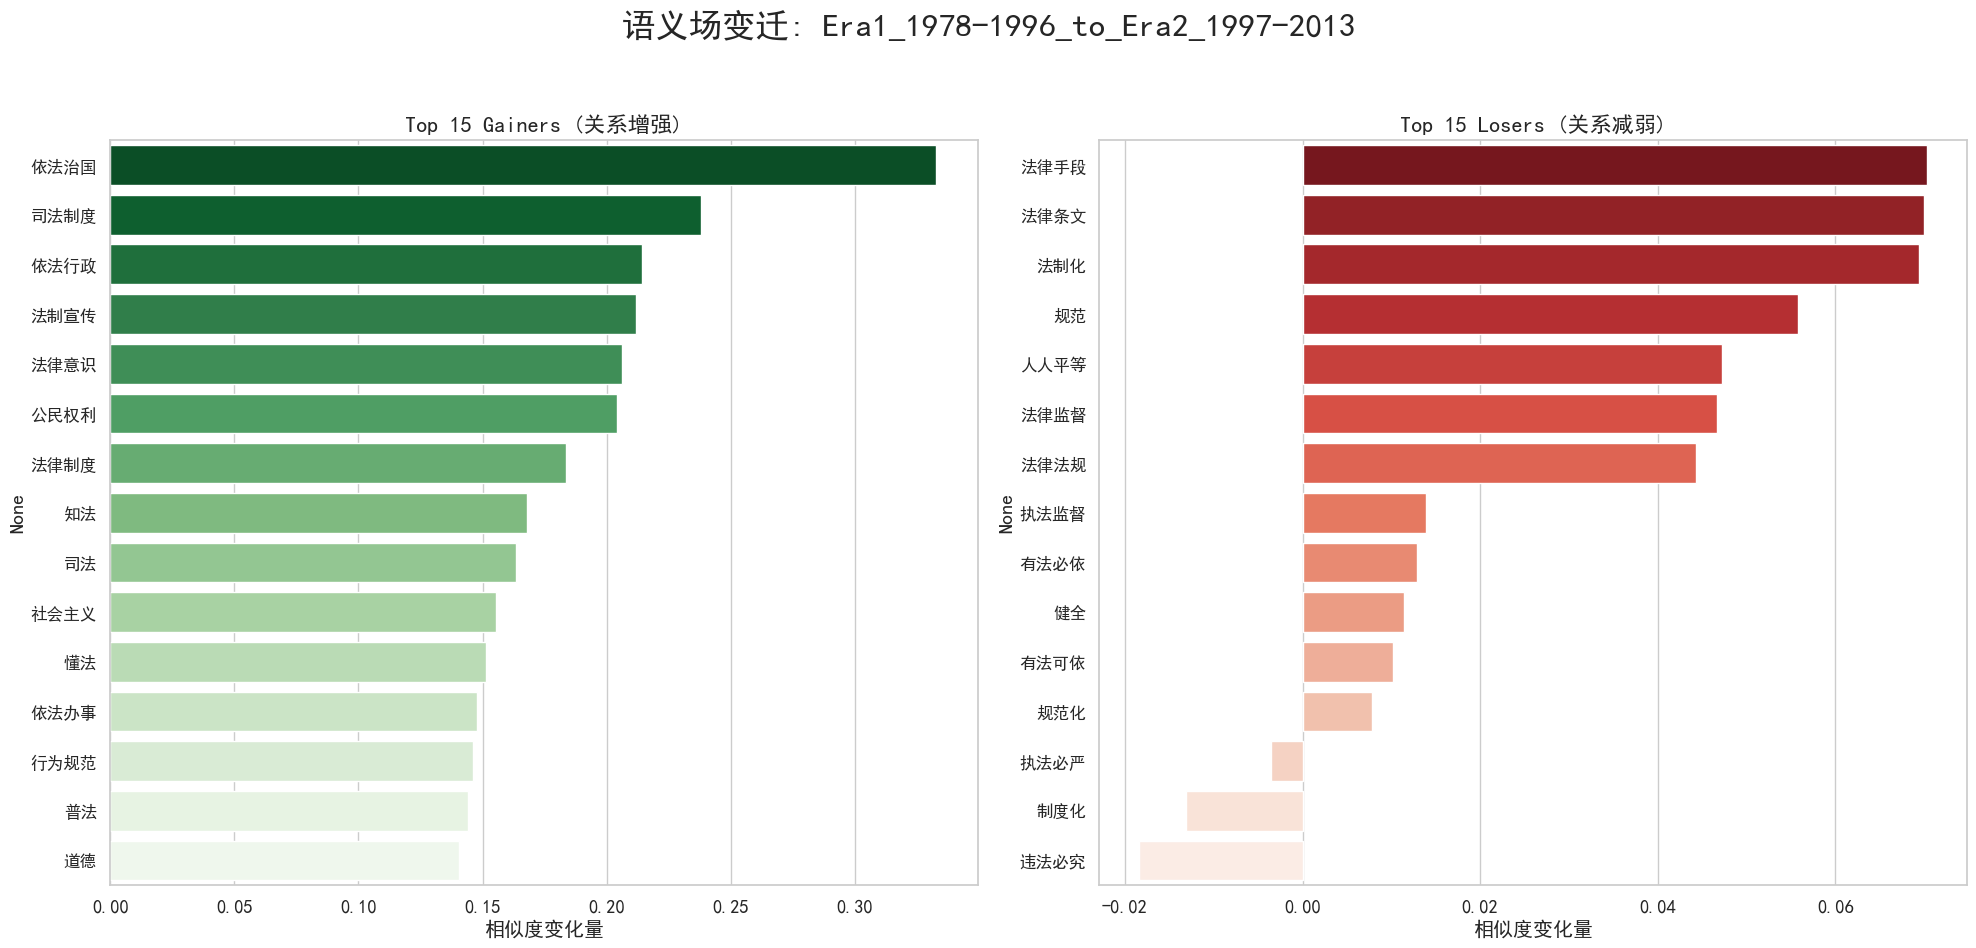

已保存图表到: /home/fangshikai/law-word-vector/output/change_analysis_v2/S3_expert_intersect/change_Era2_1997-2013_to_Era3_2014-2024_expert.png


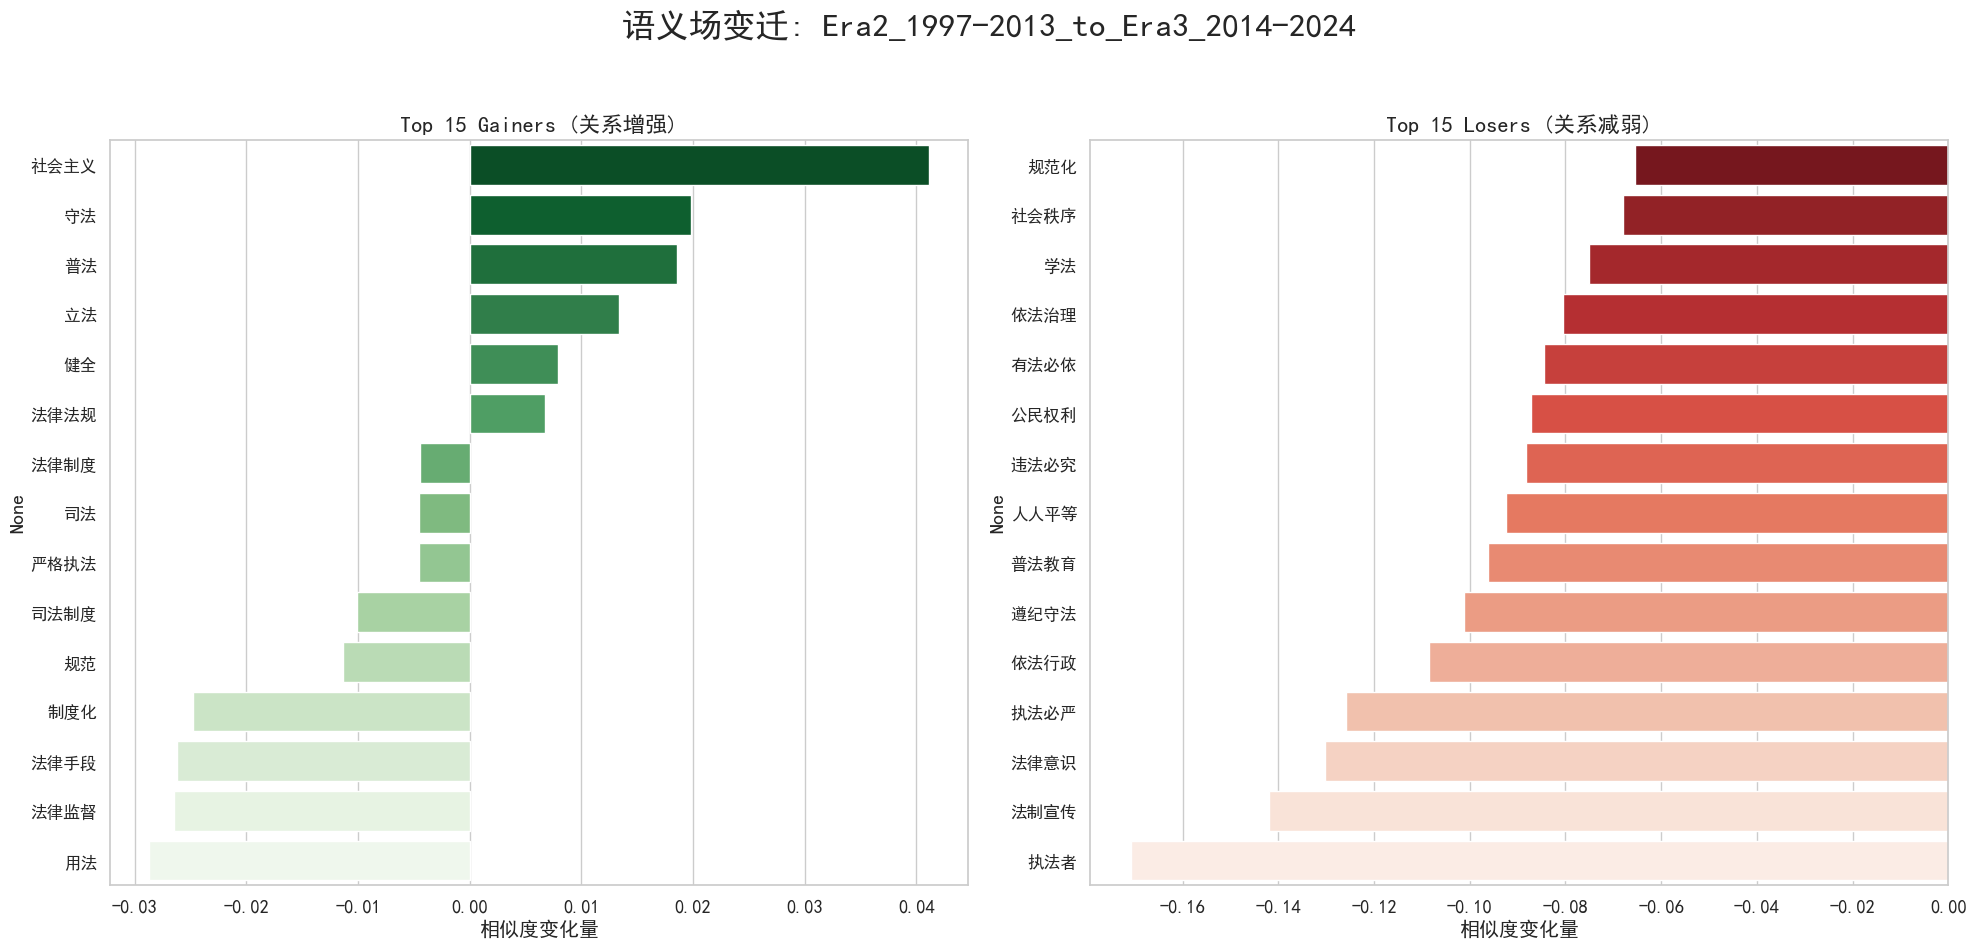

In [5]:
# --- 场景3: 来源(时期专家词表) + 处理(交集) ---
print("\n\n--- 场景3: 来源(时期专家词表) + 处理(交集) ---")
base_path = PROJECT_ROOT / "notebooks" / "similar_words"
file_map_sc3 = {
    'Era1_1978-1996': base_path / 'Era1_1978-1996_final.txt',
    'Era2_1997-2013': base_path / 'Era2_1997-2013_final.txt',
    'Era3_2014-2024': base_path / 'Era3_2014-2024_final.txt'
}
change_df_3 = analyzer.analyze_similarity_change(
    target_word="法治",
    source_strategy='from_period_specific_files',
    process_mode='intersection',
    file_map=file_map_sc3
)
if not change_df_3.empty:
    for transition in change_df_3.columns:
        analyzer.plot_gainers_losers(change_df_3[transition], top_n=15, output_dir=output_root / "S3_expert_intersect", filename=f"change_{transition}_expert")